# Run the whole deltas algorithm

In [66]:
%load_ext autoreload
%autoreload 2

import deltas.pipeline.run as run
from deltas.model import SSL

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [67]:
N1 = 10000
N2 = 10
data_clf = run.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


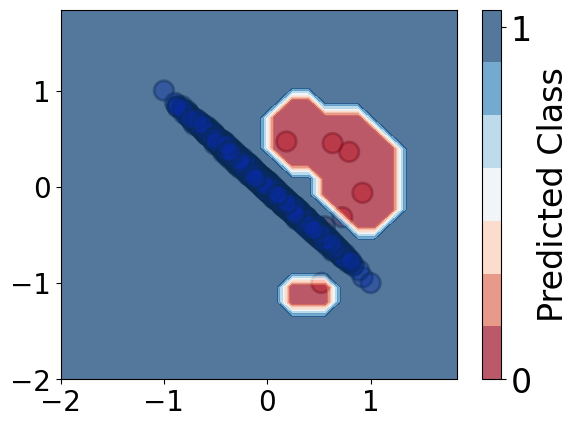

SMOTE


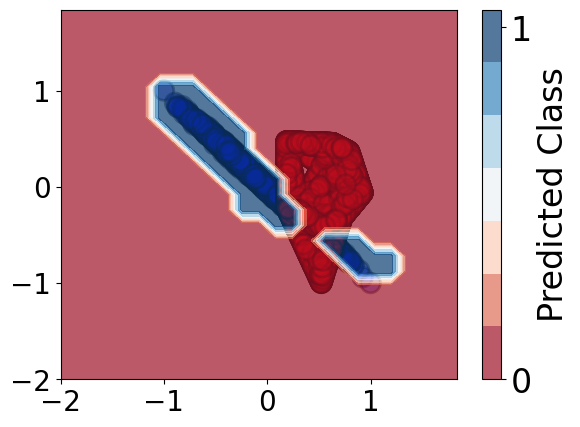

In [68]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


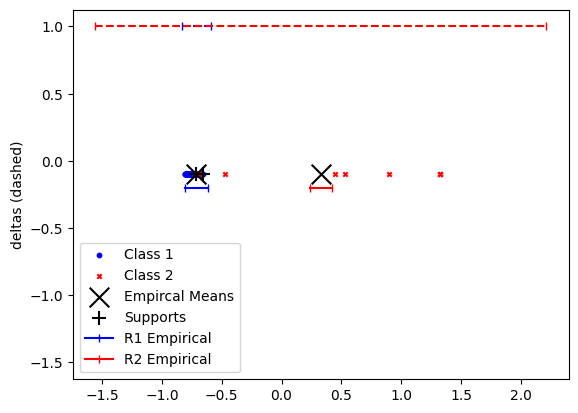

Unable to find result with SSL, increase the budget


In [74]:
from deltas.model import downsample
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = as.reprojection_deltas(
deltas_model = SSL.SSL_deltas(
# deltas_model = downsample.downsample_deltas(
    clf,
).fit(X, y, _print=True, _plot=True, max_trials=100000, parallel=True)

## Show parameters

In [70]:
deltas_model.print_params()
deltas_model.print_deltas()

Parameters
                R:  1.3233843306167796
                N1: 8879
                N2: 3
                R1: 0.09523829844671794
                R2: 0.0002857718422195621
                M:  1.9813158242180282
                D:  2.0369254535928762
                C1: 1
                C2: 1
"
                  delta1: 0.0014998599859986 
                  delta2: 0.9085889869815
                  constraint: 0.0
                  


# Evaluation on test data

original accuracy: 0.74265
SMOTE accuracy: 0.89825
deltas accuracy: 0.9269

original F1: 0.6534706793240422
SMOTE F1: 0.8966217932435865
deltas F1: 0.9211349660157514

original precision0: 0.6601967386281111
SMOTE precision0: 0.8860882210373243
deltas precision0: 0.8724480893386843

original precision1: 1.0
SMOTE precision1: 0.9112028910686629
deltas precision1: 1.0



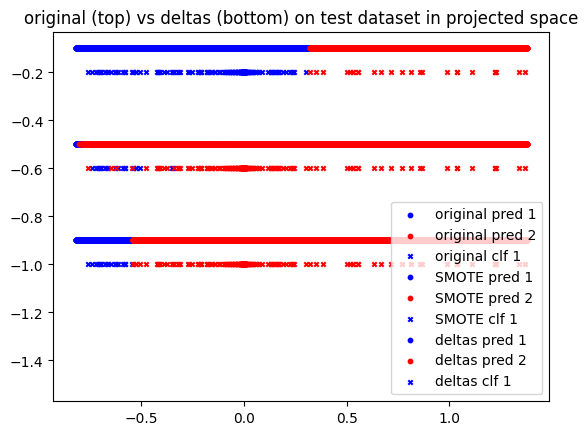

original


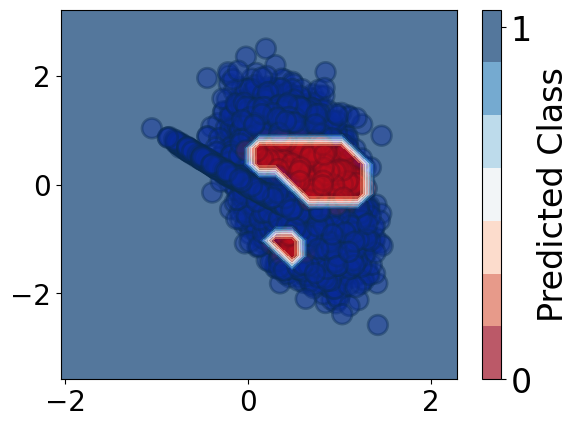

SMOTE


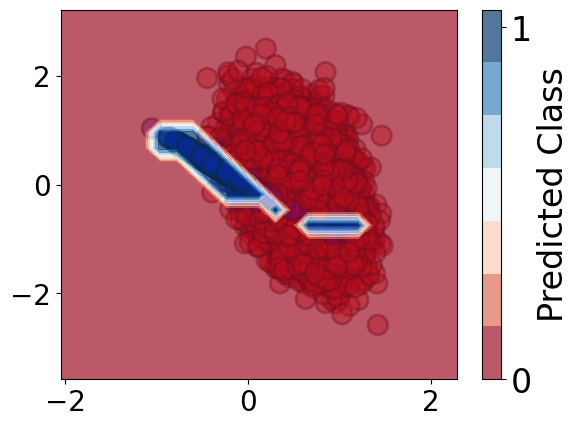

deltas


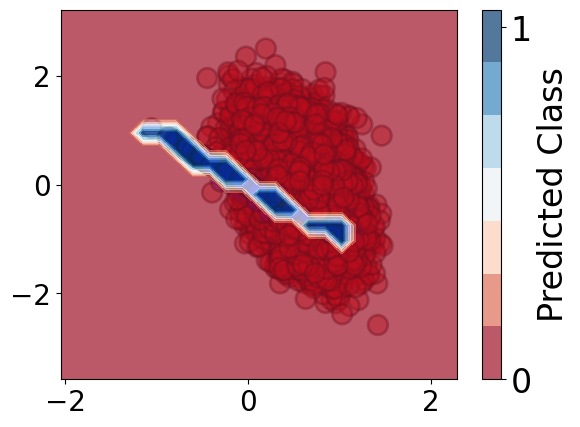

In [71]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)